In [1]:
import mne

ImportError: No module named 'mne'

In [3]:
!easy_install mne --upgrade

Searching for mne
Best match: mne 0.12.0
Processing mne-0.12.0-py3.5.egg
mne 0.12.0 is already the active version in easy-install.pth
Installing mne script to C:\Users\Samsung\Anaconda3\Scripts

Using c:\users\samsung\anaconda3\lib\site-packages\mne-0.12.0-py3.5.egg
Processing dependencies for mne
Finished processing dependencies for mne


error: Not a URL, existing file, or requirement spec: '--upgrade'


In [4]:
import mne

ImportError: No module named 'mne'

In [6]:
%matplotlib inline
import numpy as np

mne.set_log_level('WARNING')

In [5]:
import os
import mne
import time
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from pylsl import StreamInlet, resolve_stream


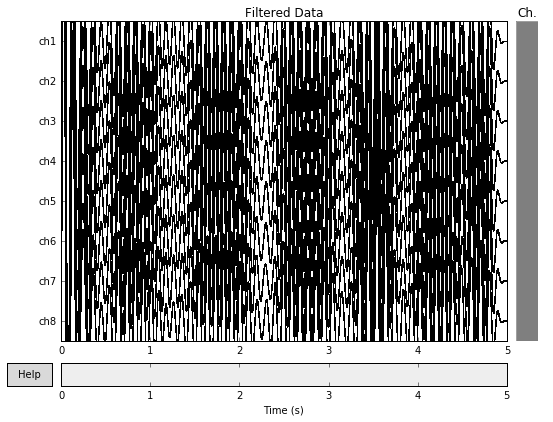

Creating RawArray with float64 data, n_channels=8, n_times=2500
    Range : 0 ... 2499 =      0.000 ...     4.998 secs
Ready.


In [ ]:
import os
import mne
import time
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from pylsl import StreamInlet, resolve_stream

plt.ion() # enable interactivity
fig=plt.figure() # make a figure
display.display(fig)
        
%matplotlib inline

streams = resolve_stream('type', 'EEG')
inlet = StreamInlet(streams[0])

sfreq = 500  # Sampling frequency
window_size=5
scalings = {'eeg': 1}
ch_types = [ 'eeg']*8
ch_names = ['ch1', 'ch2', 'ch3', 'ch4','ch5', 'ch6', 'ch7', 'ch8']
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

data=[]
data1=[]

i=0
while True:
    sample, timestamp = inlet.pull_sample()
    #tmp= map(int, line.split()[0:-2])
    data.append(sample)
    i=i+1
    #print(i)
    if i>window_size*sfreq and i%100==0 :
        if np.array(data).shape[0]>window_size*(sfreq):
            data=data[-window_size*sfreq:]
        raw = mne.io.RawArray(np.array(data).T, info)
        display.clear_output(wait=True)
        raw.plot(start=(raw.n_times/sfreq)-window_size,duration=window_size,n_channels=8, scalings=dict( eeg=1e2), 
                 title='Filtered Data',show=True,highpass=8,lowpass=12)